<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


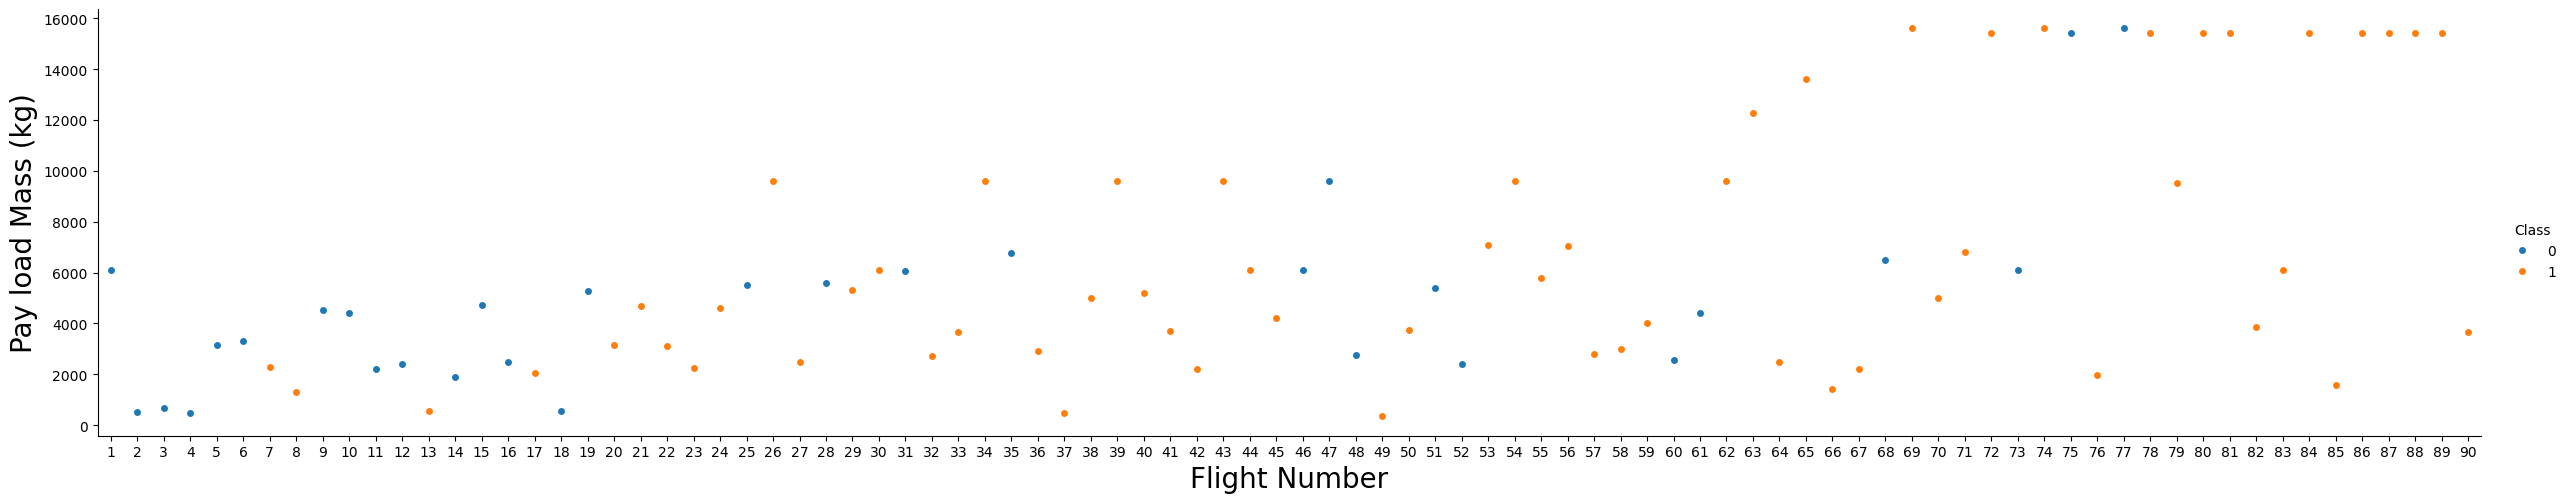

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


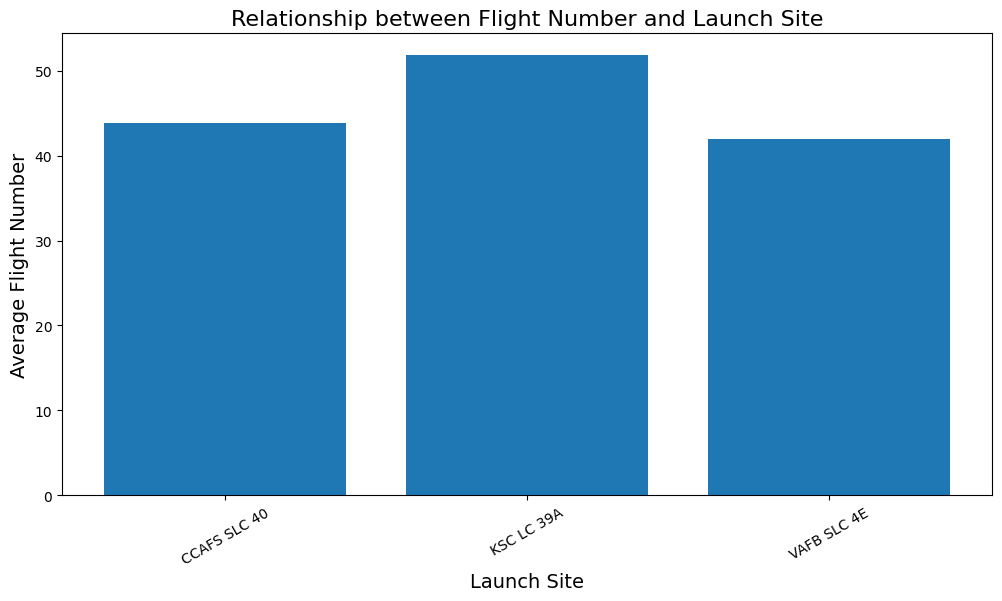

In [8]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "FlightNumber" and "LaunchSite"
# You may need to adjust column names to match your actual DataFrame

plt.figure(figsize=(12, 6))  # Set the size of the plot

# Group the data by LaunchSite and calculate the average FlightNumber for each site
grouped = df.groupby("LaunchSite")["FlightNumber"].mean()

# Create a bar plot to visualize the relationship
plt.bar(grouped.index, grouped.values)

plt.xlabel("Launch Site", fontsize=14)
plt.ylabel("Average Flight Number", fontsize=14)
plt.title("Relationship between Flight Number and Launch Site", fontsize=16)

plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


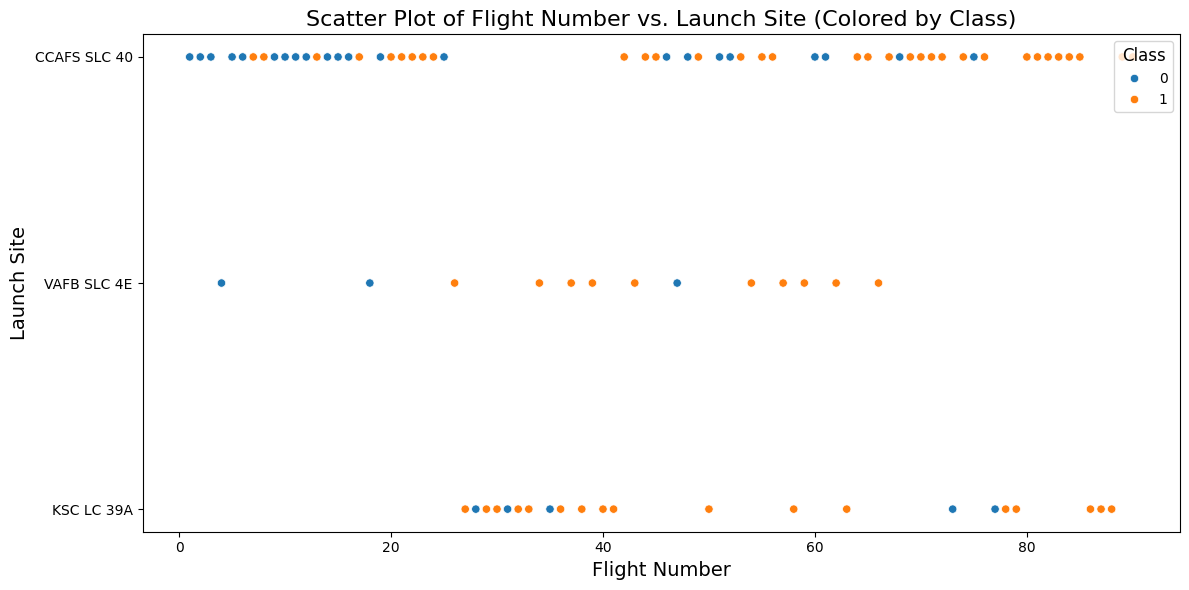

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "FlightNumber", "LaunchSite", and "Class"
# You may need to adjust column names to match your actual DataFrame

plt.figure(figsize=(12, 6))  # Set the size of the plot

# Create a scatter plot using Seaborn
sns.scatterplot(x="FlightNumber", y="LaunchSite", hue="Class",data=df)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Scatter Plot of Flight Number vs. Launch Site (Colored by Class)", fontsize=16)

plt.legend(title="Class", title_fontsize=12, loc="upper right")  # Add legend for Class

plt.tight_layout()  # Ensure the labels and data fit within the plot

plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


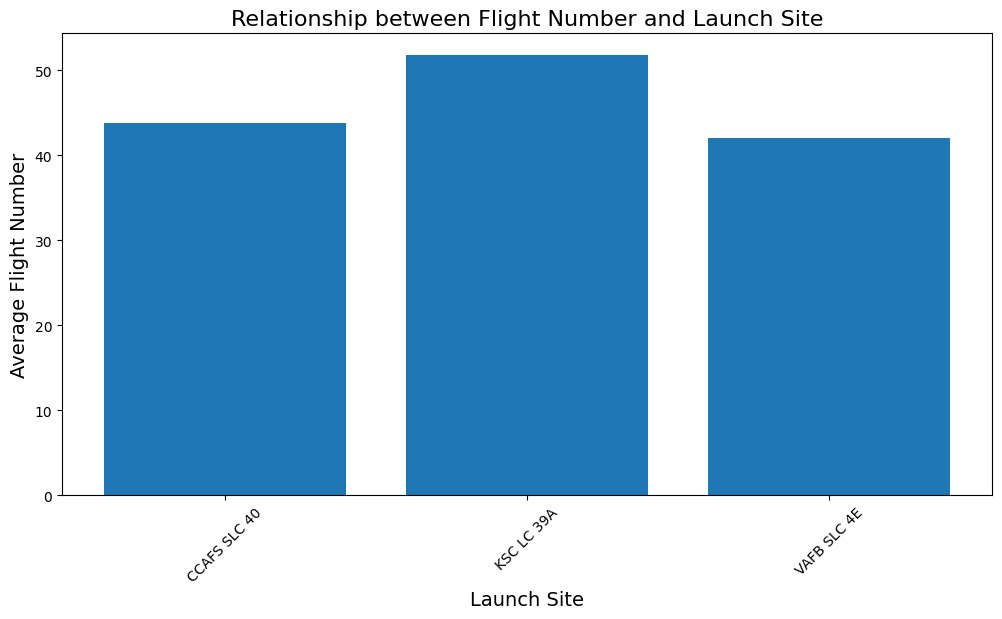

In [16]:
### TASK 2: Visualize the relationship between Payload and Launch Site
plt.figure(figsize=(12, 6))  # Set the size of the plot

# Group the data by LaunchSite and calculate the average FlightNumber for each site
grouped = df.groupby("LaunchSite")["FlightNumber"].mean()

# Create a bar plot to visualize the relationship
plt.bar(grouped.index, grouped.values)

plt.xlabel("Launch Site", fontsize=14)
plt.ylabel("Average Flight Number", fontsize=14)
plt.title("Relationship between Flight Number and Launch Site", fontsize=16)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


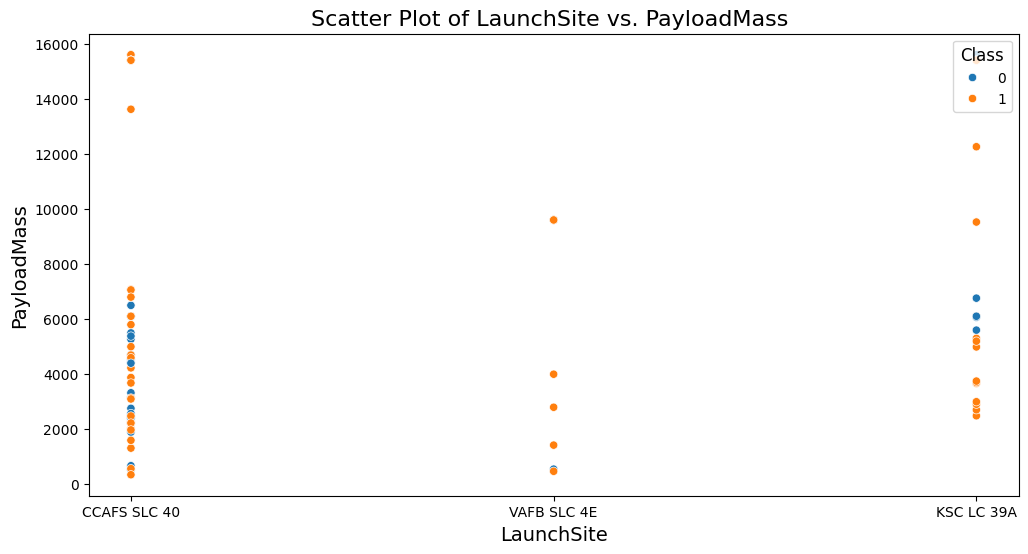

In [17]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "FlightNumber", "LaunchSite", and "Class"
# You may need to adjust column names to match your actual DataFrame

plt.figure(figsize=(12, 6))  # Set the size of the plot

# Create a scatter plot using Seaborn
sns.scatterplot(x="LaunchSite", y="PayloadMass", hue="Class",data=df)

plt.xlabel("LaunchSite", fontsize=14)
plt.ylabel("PayloadMass", fontsize=14)
plt.title("Scatter Plot of LaunchSite vs. PayloadMass ", fontsize=16)

plt.legend(title="Class", title_fontsize=12, loc="upper right")  # Add legend for Class

plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


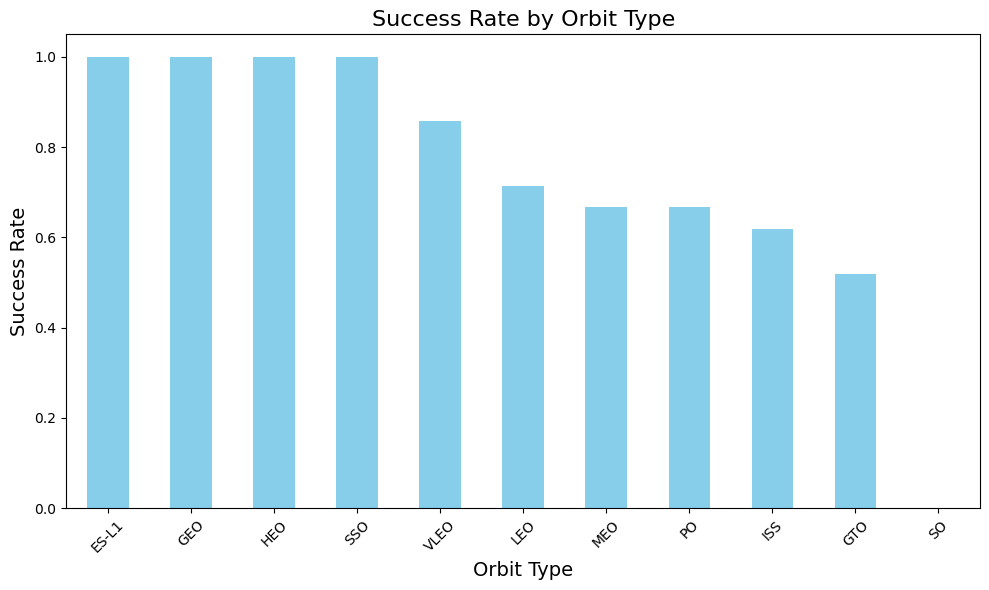

In [18]:
### TASK  3: Visualize the relationship between success rate of each orbit type
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "Orbit" and "Class"
# You may need to adjust column names to match your actual DataFrame

plt.figure(figsize=(10, 6))  # Set the size of the plot

# Calculate the success rate for each orbit type
success_rate = df.groupby("Orbit")["Class"].mean().sort_values(ascending=False)

# Create a bar chart to visualize the success rate
success_rate.plot(kind="bar", color="skyblue")

plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=16)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels and data fit within the plot

plt.show()


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


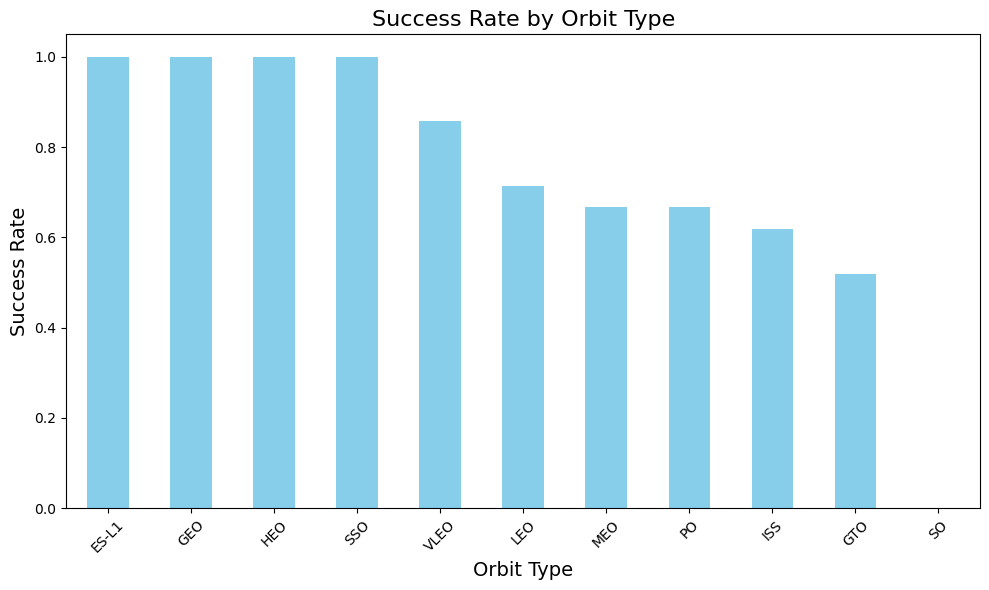

In [19]:
# HINT use groupby method on Orbit column and get the mean of Class column
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "Orbit" and "Class"
# You may need to adjust column names to match your actual DataFrame

plt.figure(figsize=(10, 6))  # Set the size of the plot

# Group the data by "Orbit" and calculate the mean of the "Class" column
success_rate_by_orbit = df.groupby("Orbit")["Class"].mean().sort_values(ascending=False)

# Create a bar chart to visualize the success rate by orbit type
success_rate_by_orbit.plot(kind="bar", color="skyblue")

plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=16)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels and data fit within the plot

plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.


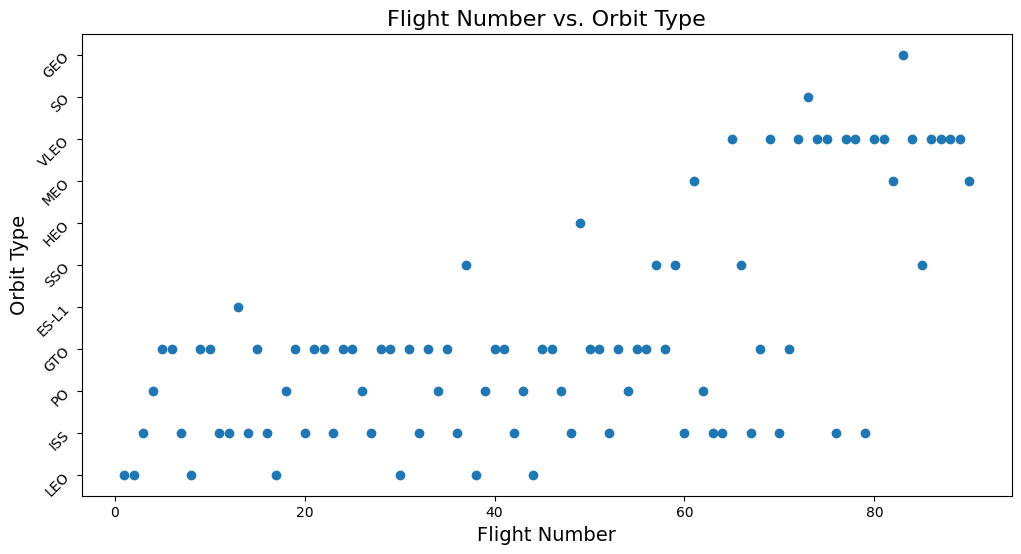

In [26]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "FlightNumber" and "Orbit"
# You may need to adjust column names to match your actual DataFrame

plt.figure(figsize=(12, 6))  # Set the size of the plot

# Create a scatter plot with Flight Number on the x-axis and Orbit on the y-axis
plt.scatter(df["FlightNumber"], df["Orbit"])

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs. Orbit Type", fontsize=16)

plt.yticks(rotation=45)  # Rotate y-axis labels for better readability
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


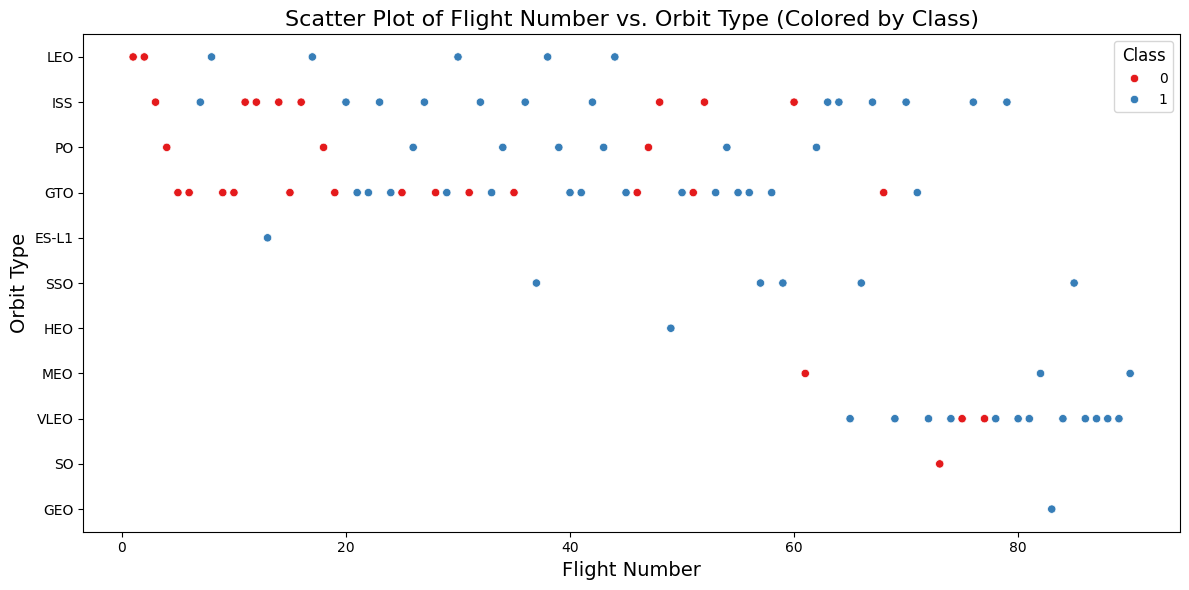

In [30]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "FlightNumber", "Orbit", and "Class"
# You may need to adjust column names to match your actual DataFrame

plt.figure(figsize=(12, 6))  # Set the size of the plot

# Create a scatter plot using Seaborn
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df, palette="Set1")

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Scatter Plot of Flight Number vs. Orbit Type (Colored by Class)", fontsize=16)

plt.legend(title="Class", title_fontsize=12, loc="upper right")  # Add legend for Class

plt.tight_layout()  # Ensure the labels and data fit within the plot

plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


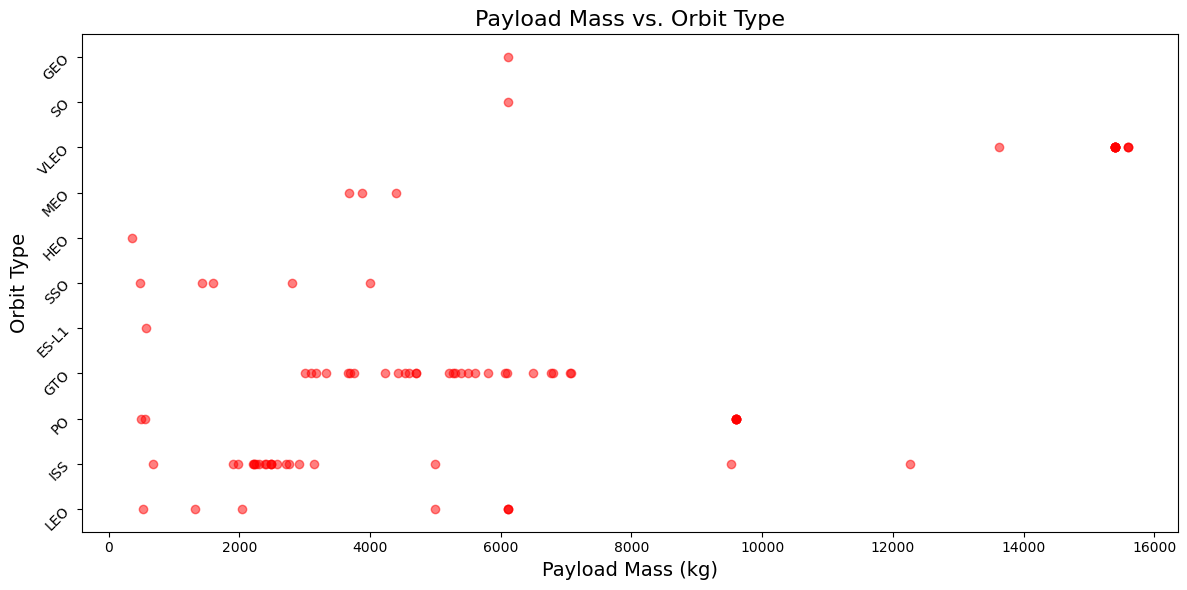

In [32]:
### TASK  5: Visualize the relationship between Payload and Orbit type
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "PayloadMass" and "Orbit"
# You may need to adjust column names to match your actual DataFrame

plt.figure(figsize=(12, 6))  # Set the size of the plot

# Create a scatter plot with Payload on the x-axis and Orbit on the y-axis
plt.scatter(df["PayloadMass"], df["Orbit"], marker='o', alpha=0.5, color='red')

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs. Orbit Type", fontsize=16)

plt.yticks(rotation=45)  # Rotate y-axis labels for better readability
plt.tight_layout()  # Ensure the labels and data fit within the plot

plt.show()


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


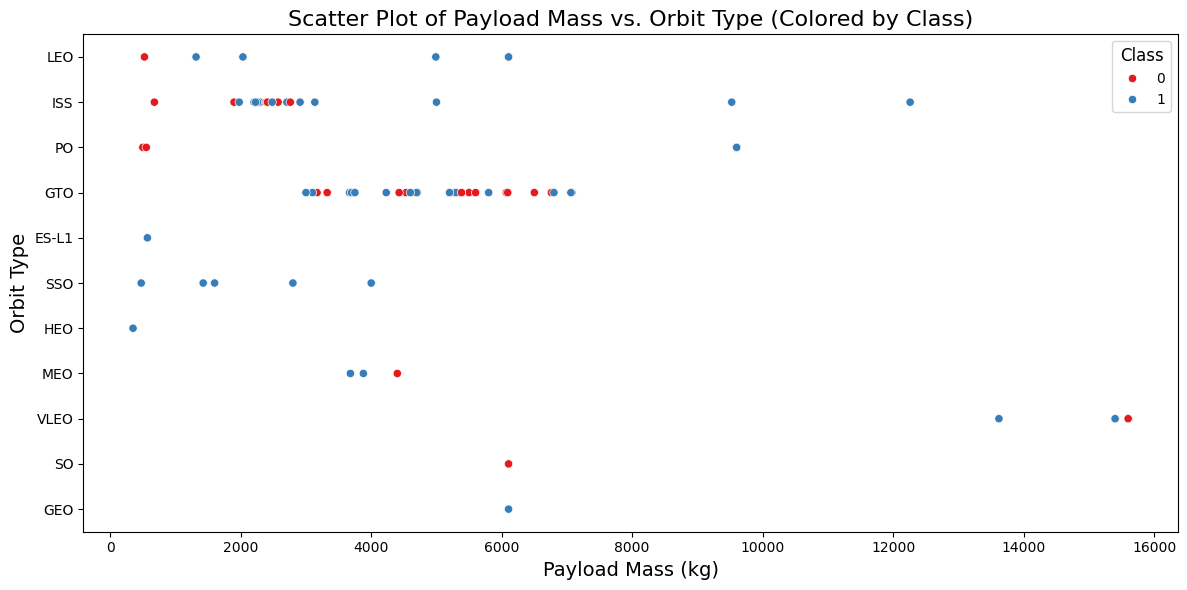

In [33]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns "PayloadMass", "Orbit", and "Class"
# You may need to adjust column names to match your actual DataFrame

plt.figure(figsize=(12, 6))  # Set the size of the plot

# Create a scatter plot using Seaborn
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df, palette="Set1")

plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Scatter Plot of Payload Mass vs. Orbit Type (Colored by Class)", fontsize=16)

plt.legend(title="Class", title_fontsize=12, loc="upper right")  # Add legend for Class

plt.tight_layout()  # Ensure the labels and data fit within the plot

plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


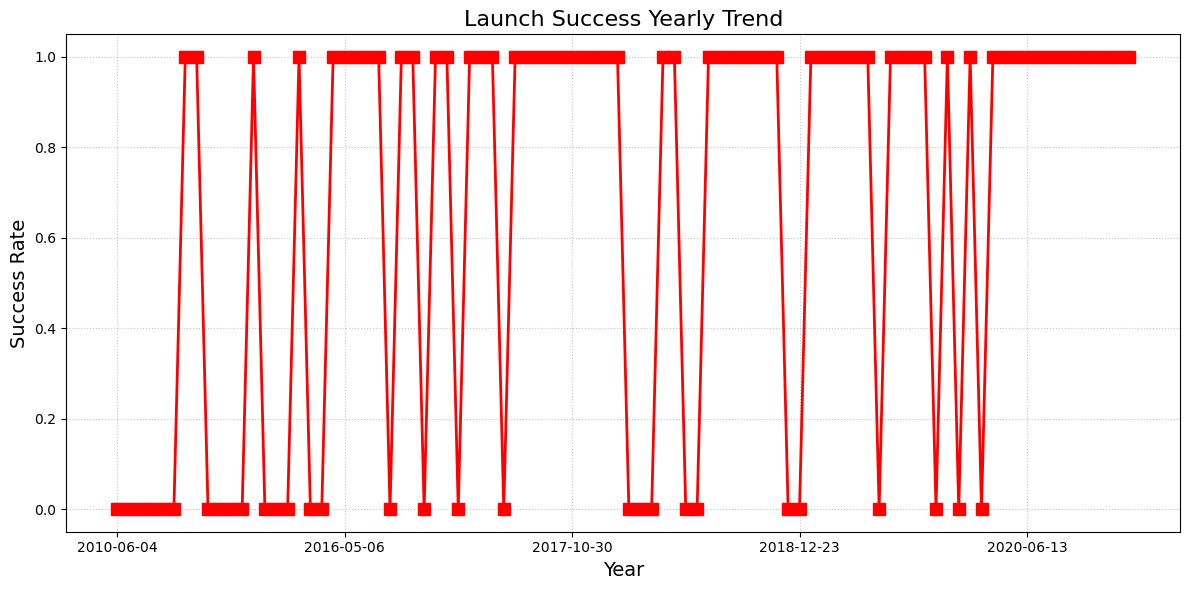

In [41]:
### TASK  6: Visualize the launch success yearly trend
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with a "LaunchYear" column and a "Class" column
# You may need to adjust column names to match your actual DataFrame

plt.figure(figsize=(12, 6))  # Set the size of the plot

# Group the data by "LaunchYear" and calculate the mean of the "Class" column
success_rate_by_year = df.groupby("Date")["Class"].mean()

# Create a line plot to visualize the success rate trend over the years
success_rate_by_year.plot(marker='s', color='red', linestyle='-', linewidth=2, markersize=8)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Launch Success Yearly Trend", fontsize=16)

plt.grid(True, linestyle='dotted', alpha=0.7)  # Add grid lines

plt.tight_layout()  # Ensure the labels and data fit within the plot

plt.show()



You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [42]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


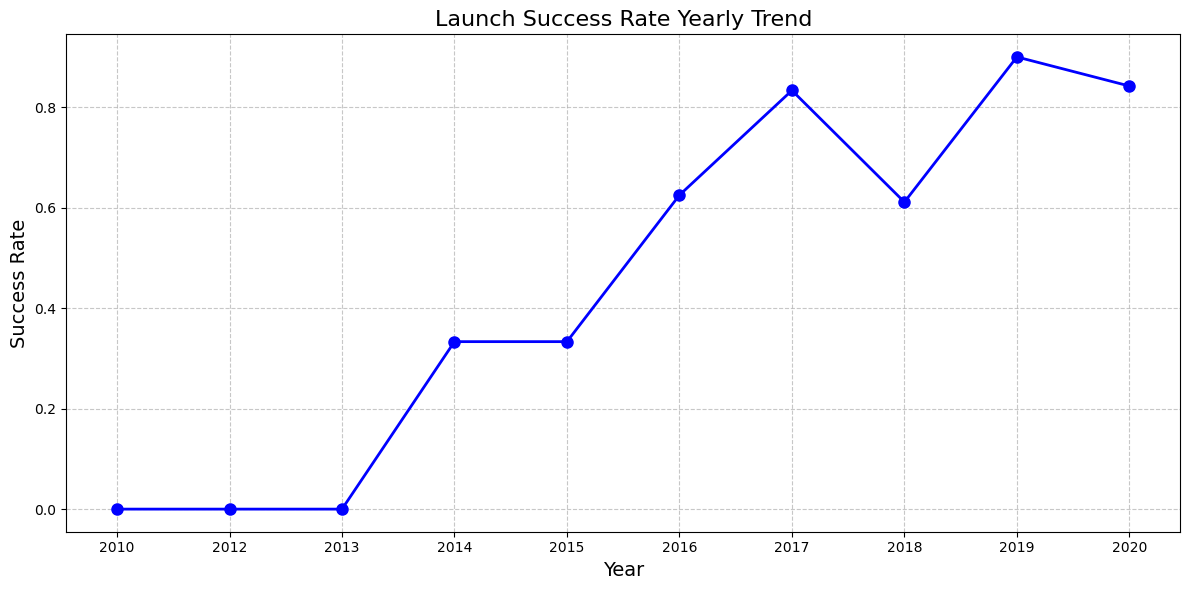

In [51]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
import matplotlib.pyplot as plt

# Use the Extract_year function to extract years from the "Date" column
year = Extract_year()
# Calculate the success rate for each year
success_rate_by_year = df.groupby("Date")["Class"].mean()

plt.figure(figsize=(12, 6))  # Set the size of the plot

# Create a line chart to visualize the success rate trend over the years
plt.plot(success_rate_by_year.index, success_rate_by_year.values, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Launch Success Rate Yearly Trend", fontsize=16)

plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines

plt.tight_layout()  # Ensure the labels and data fit within the plot

plt.show()



you can observe that the sucess rate since 2013 kept increasing till 2020


In [52]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [62]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

<class 'KeyError'>: "['Orbit', 'LaunchSite', 'LandingPad', 'Block'] not in index"

In [54]:
import pandas as pd

# Specify the categorical columns for which you want to create dummy variables
categorical_columns = ["Orbit", "LaunchSite", "LandingPad", "Block"]

# Create dummy variables for the specified columns
df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Display the resulting DataFrame with dummy variables
df_dummies.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,ReusedCount,...,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Block_1.0,Block_2.0,Block_3.0,Block_4.0,Block_5.0
0,1,2010,Falcon 9,6104.959412,None None,1,False,False,False,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2012,Falcon 9,525.000000,None None,1,False,False,False,0,...,0,0,0,0,0,1,0,0,0,0
2,3,2013,Falcon 9,677.000000,None None,1,False,False,False,0,...,0,0,0,0,0,1,0,0,0,0
3,4,2013,Falcon 9,500.000000,False Ocean,1,False,False,False,0,...,0,0,0,0,0,1,0,0,0,0
4,5,2013,Falcon 9,3170.000000,None None,1,False,False,False,0,...,0,0,0,0,0,1,0,0,0,0


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [61]:
# HINT: Use get_dummies() function on the categorical columns
import pandas as pd

# Specify the categorical columns for which you want to create dummy variables
categorical_columns = ["Orbit", "LaunchSite", "LandingPad", "Block"]

# Create dummy variables for the specified columns
df = pd.get_dummies(df, columns=categorical_columns)

# Display the resulting DataFrame with dummy variables
df.head()



<class 'KeyError'>: "None of [Index(['Orbit', 'LaunchSite', 'LandingPad', 'Block'], dtype='object')] are in the [columns]"

In [58]:
### TASK  8: Cast all numeric columns to `float64`
df=df.astype(float)
print(df.dtypes)

<class 'ValueError'>: could not convert string to float: 'Falcon 9'

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [63]:
# HINT: use astype function

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
